In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_results = pd.read_csv('../Data/similarity.csv')
df = pd.read_csv('../Data/similarity.csv')

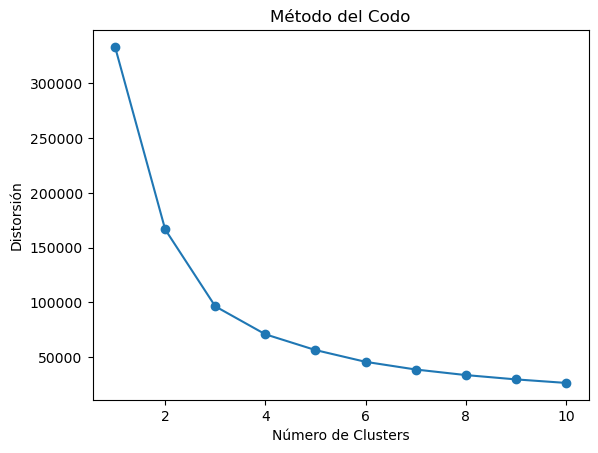

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


distortions = []

# num max de clusters a provar
max_clusters = 10


for n_clusters in range(1, max_clusters+1):
    # Crear el modelo de clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # Ajustar el modelo a los datos
    kmeans.fit(df)
    # Calcular la distorsión (inertia) y añadirla a la lista
    distortions.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, max_clusters+1), distortions, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorsión')
plt.show()


      Mol1  Mol2  Similarity  Cluster
0        0     1    0.954669        0
1        0     2    0.938462        0
2        0     3    0.770980        0
3        0     4    0.889984        0
4        0     5    0.948649        0
...    ...   ...         ...      ...
1220    46    48    0.869041        0
1221    46    49    0.914943        0
1222    47    48    0.868322        0
1223    47    49    0.929835        0
1224    48    49    0.879564        0

[1225 rows x 4 columns]


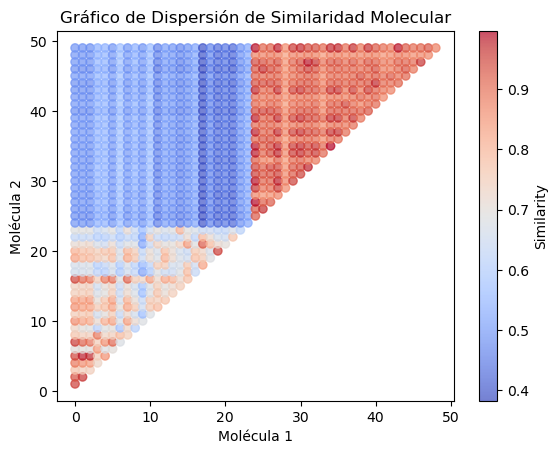

In [27]:



# Supongamos que tienes un DataFrame llamado df_results con las columnas 'Mol1', 'Mol2' y 'Similarity'

# Crear una matriz de características para el clustering
X = df_results[['Similarity']]

# Crear un objeto KMeans con el número deseado de clusters
n_clusters = 2  # Número de clusters que deseas crear
kmeans = KMeans(n_clusters=n_clusters)

# Realizar el clustering
kmeans.fit(X)

# Obtener las etiquetas de cluster asignadas a cada molécula
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
df_results['Cluster'] = labels

# Imprimir el DataFrame con las etiquetas de cluster
print(df_results)

# Crear el scatter plot
plt.scatter(df_results['Mol1'], df_results['Mol2'], c=df_results['Similarity'], cmap='coolwarm', alpha=0.7)

# Personalizar el scatter plot
plt.title('Gráfico de Dispersión de Similaridad Molecular')
plt.xlabel('Molécula 1')
plt.ylabel('Molécula 2')
plt.colorbar(label='Similarity')

# Mostrar el scatter plot
plt.show()


(array([ 91., 333., 180.,  53.,  76.,  72.,  50.,  70., 204.,  96.]),
 array([0.38264739, 0.44403381, 0.50542023, 0.56680666, 0.62819308,
        0.68957951, 0.75096593, 0.81235236, 0.87373878, 0.9351252 ,
        0.99651163]),
 <BarContainer object of 10 artists>)

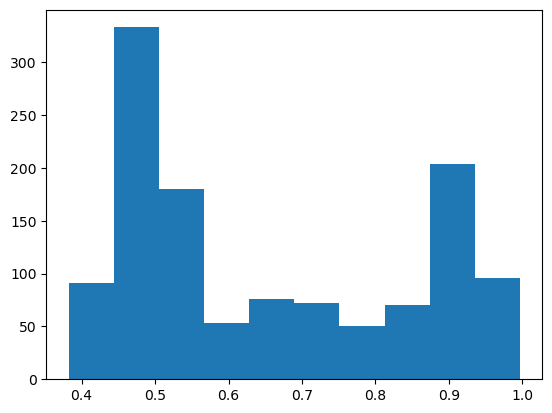

In [32]:
df_results.hist
plt.hist(df_results.Similarity)

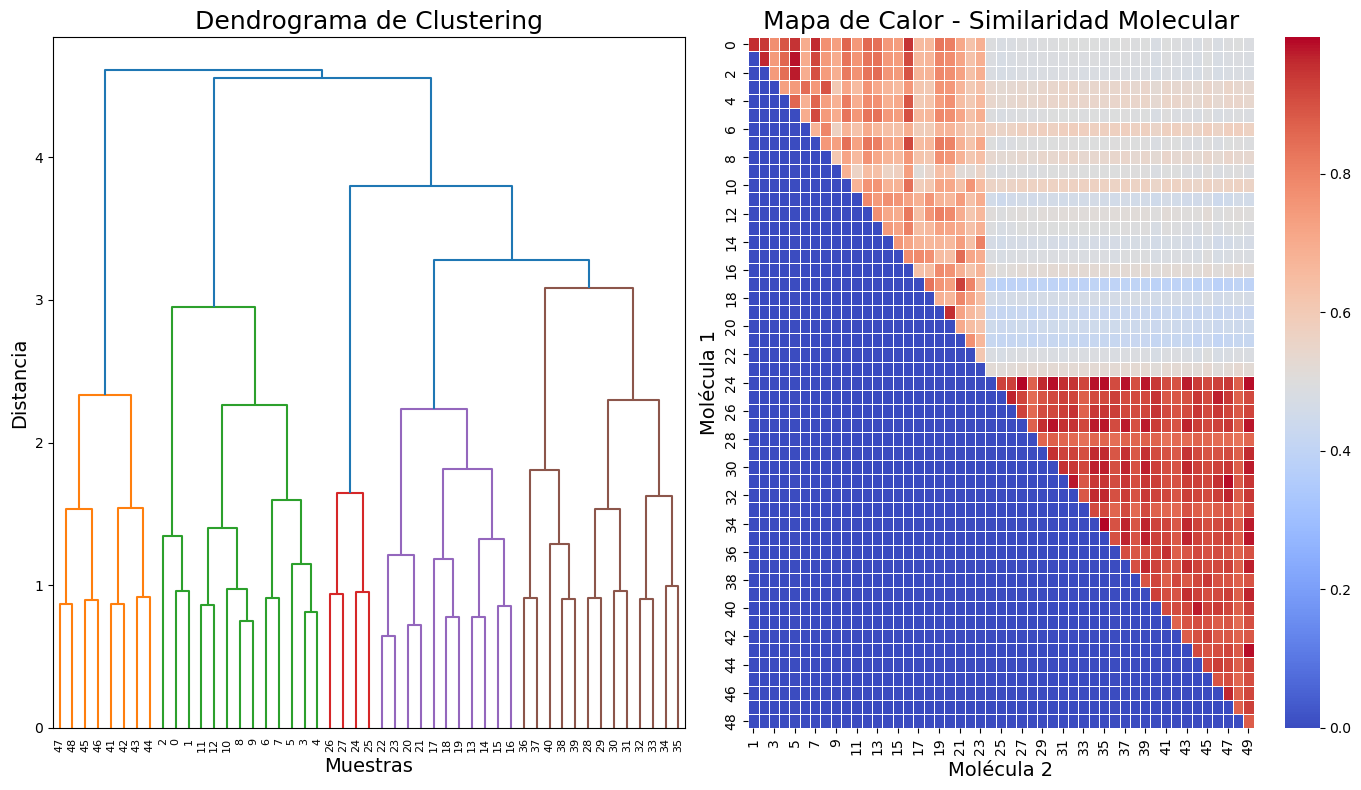

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Supongamos que tienes un DataFrame llamado df_results con las columnas 'Mol1', 'Mol2', 'Similarity' y 'Cluster'

# Crear una matriz de similitud
matrix = df_results.pivot(index='Mol1', columns='Mol2', values='Similarity').fillna(0)

# Calcular la matriz de distancias
distances = 1 - matrix.values

# Calcular los enlaces utilizando el método de enlace completo (complete linkage)
links = linkage(distances, method='complete')

# Configurar los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Tramar el dendrograma en el primer subplot
dendrogram(links, labels=matrix.index, leaf_rotation=90, leaf_font_size=8, ax=ax1)
ax1.set_title('Dendrograma de Clustering', fontsize=18)
ax1.set_xlabel('Muestras', fontsize=14)
ax1.set_ylabel('Distancia', fontsize=14)

# Tramar el heatmap en el segundo subplot
sns.heatmap(matrix, cmap='coolwarm', annot=False, linewidths=0.5, ax=ax2)
ax2.set_title('Mapa de Calor - Similaridad Molecular', fontsize=18)
ax2.set_xlabel('Molécula 2', fontsize=14)
ax2.set_ylabel('Molécula 1', fontsize=14)

# Ajustar los subplots para evitar superposición
plt.tight_layout()

# Mostrar el dendrograma y el heatmap juntos
plt.show()


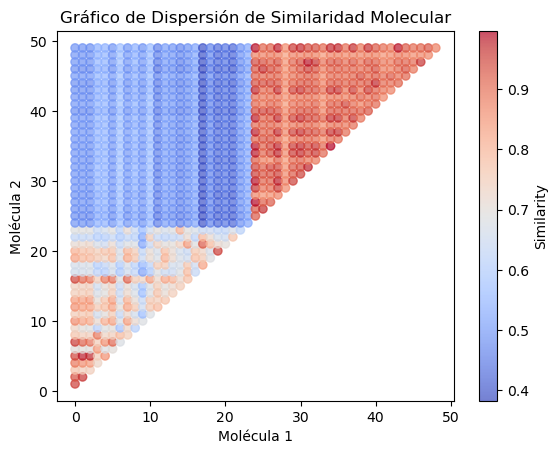

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df_results con las columnas 'Mol1', 'Mol2' y 'Similarity'

# Crear el scatter plot
plt.scatter(df_results['Mol1'], df_results['Mol2'], c=df_results['Similarity'], cmap='coolwarm', alpha=0.7)

# Personalizar el scatter plot
plt.title('Gráfico de Dispersión de Similaridad Molecular')
plt.xlabel('Molécula 1')
plt.ylabel('Molécula 2')
plt.colorbar(label='Similarity')

# Mostrar el scatter plot
plt.show()
